In [282]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
df = pd.read_csv('50Grand.txt', sep=",")

In [285]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [287]:
df.isna().sum()

,0
39,0
State-gov,0
77516,0
Bachelors,0
13,0
Never-married,0
Adm-clerical,0
Not-in-family,0
White,0
Male,0


In [288]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Rename 39 to age, 77516 to address,

Column Names: 39	State-gov	77516	Bachelors	13	Never-married	Adm-clerical	Not-in-family	White	Male	2174	0	40	United-States	<=50K

In [289]:
df.rename(columns={'39': 'age',
                   ' 77516': 'address',
                   ' 13': 'education_level',
                   ' 2174': 'capital_gains',
                   ' 0': 'capital_loss',
                   ' 40': 'hours_week_work'}, inplace=True)

In [290]:
df.columns

Index(['age', ' State-gov', 'address', ' Bachelors', 'education_level',
       ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male',
       'capital_gains', 'capital_loss', 'hours_week_work', ' United-States',
       ' <=50K'],
      dtype='object')

In [291]:
df

,age,State-gov,address,Bachelors,education_level,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gains,capital_loss,hours_week_work,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Correlation Chart

In [292]:
df_numerical = df.select_dtypes(include=[np.number])
df_categorical = df.select_dtypes(include=['object'])
df_numerical.corr().style.background_gradient(cmap='coolwarm')

,age,address,education_level,capital_gains,capital_loss,hours_week_work
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
address,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education_level,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital_gains,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours_week_work,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [293]:
df.columns

Index(['age', ' State-gov', 'address', ' Bachelors', 'education_level',
       ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male',
       'capital_gains', 'capital_loss', 'hours_week_work', ' United-States',
       ' <=50K'],
      dtype='object')

In [294]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

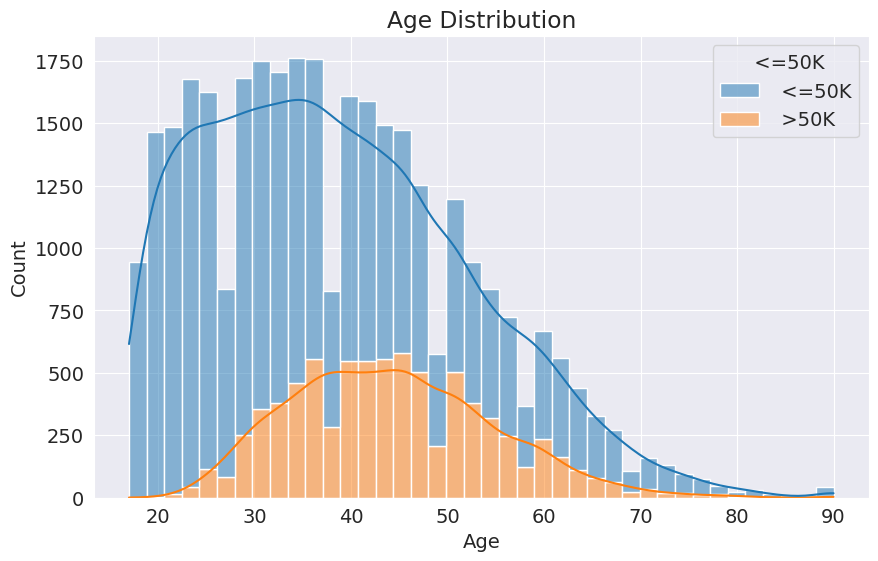

In [295]:
sns.histplot(data=df, x='age', hue=' <=50K', bins=40, kde=True, multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [296]:
px.histogram(df,
             x='education_level',
             title='Education Level Vs. Income (Earning More or Less than $50,000)',
             color=' <=50K',
             barmode='group',
             text_auto=True)

In [297]:
px.scatter(df,
           title='Capital Gains vs Capital Losses',
           x='capital_gains',
           y='capital_loss',
           color=' <=50K')

In [298]:
fig = px.bar(df,
       x='age',
       y='capital_gains',
       color=' <=50K')
fig.show()

In [299]:
px.bar(df,
       x='age',
       y='capital_loss',
       color=' <=50K')

In [300]:
px.histogram(df,
             x='hours_week_work',
             y='capital_gains',
             color=' <=50K')

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

In [301]:
from sklearn.model_selection import train_test_split

The target column is titled ' <=50K'. To make creating the model more efficient, we will rename the column to '<=50k'

In [302]:
df.rename(columns={' <=50K': '<=50k'}, inplace=True)

In [303]:
train = df.drop('<=50k', axis=1)
target = df['<=50k']

In [304]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [305]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [306]:
print(f"Total # of samples in the dataset: {len(df)}")
print(f"Total # of samples in the training set: {len(X_train)}")
print(f"Total # of samples in the validation set: {len(X_val)}")
print(f"Total # of samples in the test set: {len(X_test)}")

Total # of samples in the dataset: 32560
Total # of samples in the training set: 26048
Total # of samples in the validation set: 3256
Total # of samples in the test set: 3256


Imputing missing numeric values (nonexistent in this dataset, but still handy)

Comment out this Block to Save Time

In [307]:
'''from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean').fit(train)

train_df = imputer.transform(X_train)
val_df = imputer.transform(X_val)
test_df = imputer.transform(X_test)'''

"from sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy = 'mean').fit(train)\n\ntrain_df = imputer.transform(X_train)\nval_df = imputer.transform(X_val)\ntest_df = imputer.transform(X_test)"

# MinMax Scaling

In [308]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = train.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler().fit(train[numerical_cols])

# We'll Need to Change X_train's columns from nums back to its original columns
train_df = pd.DataFrame(scaler.transform(X_train[numerical_cols]), columns=numerical_cols)
val_df = pd.DataFrame(scaler.transform(X_val[numerical_cols]), columns=numerical_cols)
test_df = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols)

In [309]:
val_df.describe().loc[['min', 'max']]

,age,address,education_level,capital_gains,capital_loss,hours_week_work
min,0.0,0.004766,0.0,0.0,0.000000,0.0
max,1.0,0.612028,1.0,1.0,0.648301,1.0


# Encoding Categorical Data

In [310]:
from sklearn.preprocessing import OneHotEncoder

In [311]:
categorical_cols = train.select_dtypes(include=['object']).columns

In [312]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train[categorical_cols])

In [313]:
train_df_cat = pd.DataFrame(encoder.transform(X_train[categorical_cols]))
val_df_cat = pd.DataFrame(encoder.transform(X_val[categorical_cols]))
test_df_cat = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

In [314]:
# Revert the column names back to normal for categorical_cols to improve our ability to know what features are important
train_df_cat.columns = encoder.get_feature_names_out(categorical_cols)
val_df_cat.columns = encoder.get_feature_names_out(categorical_cols)
test_df_cat.columns = encoder.get_feature_names_out(categorical_cols)

In [315]:
val_df_cat

,State-gov_ ?,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,State-gov_ State-gov,State-gov_ Without-pay,Bachelors_ 10th,Bachelors_ 11th,Bachelors_ 12th,Bachelors_ 1st-4th,Bachelors_ 5th-6th,Bachelors_ 7th-8th,Bachelors_ 9th,Bachelors_ Assoc-acdm,Bachelors_ Assoc-voc,Bachelors_ Bachelors,Bachelors_ Doctorate,Bachelors_ HS-grad,Bachelors_ Masters,Bachelors_ Preschool,Bachelors_ Prof-school,Bachelors_ Some-college,Never-married_ Divorced,Never-married_ Married-AF-spouse,Never-married_ Married-civ-spouse,Never-married_ Married-spouse-absent,Never-married_ Never-married,Never-married_ Separated,Never-married_ Widowed,Adm-clerical_ ?,Adm-clerical_ Adm-clerical,Adm-clerical_ Armed-Forces,Adm-clerical_ Craft-repair,Adm-clerical_ Exec-managerial,Adm-clerical_ Farming-fishing,Adm-clerical_ Handlers-cleaners,Adm-clerical_ Machine-op-inspct,Adm-clerical_ Other-service,Adm-clerical_ Priv-house-serv,Adm-clerical_ Prof-specialty,Adm-clerical_ Protective-serv,Adm-clerical_ Sales,Adm-clerical_ Tech-support,Adm-clerical_ Transport-moving,Not-in-family_ Husband,Not-in-family_ Not-in-family,Not-in-family_ Other-relative,Not-in-family_ Own-child,Not-in-family_ Unmarried,Not-in-family_ Wife,White_ Amer-Indian-Eskimo,White_ Asian-Pac-Islander,White_ Black,White_ Other,White_ White,Male_ Female,Male_ Male,United-States_ ?,United-States_ Cambodia,United-States_ Canada,United-States_ China,United-States_ Columbia,United-States_ Cuba,United-States_ Dominican-Republic,United-States_ Ecuador,United-States_ El-Salvador,United-States_ England,United-States_ France,United-States_ Germany,United-States_ Greece,United-States_ Guatemala,United-States_ Haiti,United-States_ Holand-Netherlands,United-States_ Honduras,United-States_ Hong,United-States_ Hungary,United-States_ India,United-States_ Iran,United-States_ Ireland,United-States_ Italy,United-States_ Jamaica,United-States_ Japan,United-States_ Laos,United-States_ Mexico,United-States_ Nicaragua,United-States_ Outlying-US(Guam-USVI-etc),United-States_ Peru,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Scaling Numeric Features

In [316]:
val_df

,age,address,education_level,capital_gains,capital_loss,hours_week_work
0,0.383562,0.215196,0.600000,0.0,0.000000,0.397959
1,0.739726,0.240224,0.800000,0.0,0.000000,0.051020
2,0.109589,0.114505,0.600000,0.0,0.000000,0.397959
3,0.547945,0.228294,0.066667,0.0,0.000000,0.397959
4,0.342466,0.035552,0.533333,0.0,0.000000,0.500000
...,...,...,...,...,...,...
3251,0.109589,0.065373,0.600000,0.0,0.000000,0.397959
3252,0.383562,0.222801,0.600000,0.0,0.000000,0.397959
3253,0.410959,0.160614,0.866667,0.0,0.000000,0.244898
3254,0.424658,0.089144,0.533333,0.0,0.000000,0.397959


In [317]:
X_train = pd.concat([train_df, train_df_cat], axis=1)
X_val = pd.concat([val_df, val_df_cat], axis=1)
X_test = pd.concat([test_df, test_df_cat], axis=1)

In [318]:
X_test

,age,address,education_level,capital_gains,capital_loss,hours_week_work,State-gov_ ?,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,State-gov_ State-gov,State-gov_ Without-pay,Bachelors_ 10th,Bachelors_ 11th,Bachelors_ 12th,Bachelors_ 1st-4th,Bachelors_ 5th-6th,Bachelors_ 7th-8th,Bachelors_ 9th,Bachelors_ Assoc-acdm,Bachelors_ Assoc-voc,Bachelors_ Bachelors,Bachelors_ Doctorate,Bachelors_ HS-grad,Bachelors_ Masters,Bachelors_ Preschool,Bachelors_ Prof-school,Bachelors_ Some-college,Never-married_ Divorced,Never-married_ Married-AF-spouse,Never-married_ Married-civ-spouse,Never-married_ Married-spouse-absent,Never-married_ Never-married,Never-married_ Separated,Never-married_ Widowed,Adm-clerical_ ?,Adm-clerical_ Adm-clerical,Adm-clerical_ Armed-Forces,Adm-clerical_ Craft-repair,Adm-clerical_ Exec-managerial,Adm-clerical_ Farming-fishing,Adm-clerical_ Handlers-cleaners,Adm-clerical_ Machine-op-inspct,Adm-clerical_ Other-service,Adm-clerical_ Priv-house-serv,Adm-clerical_ Prof-specialty,Adm-clerical_ Protective-serv,Adm-clerical_ Sales,Adm-clerical_ Tech-support,Adm-clerical_ Transport-moving,Not-in-family_ Husband,Not-in-family_ Not-in-family,Not-in-family_ Other-relative,Not-in-family_ Own-child,Not-in-family_ Unmarried,Not-in-family_ Wife,White_ Amer-Indian-Eskimo,White_ Asian-Pac-Islander,White_ Black,White_ Other,White_ White,Male_ Female,Male_ Male,United-States_ ?,United-States_ Cambodia,United-States_ Canada,United-States_ China,United-States_ Columbia,United-States_ Cuba,United-States_ Dominican-Republic,United-States_ Ecuador,United-States_ El-Salvador,United-States_ England,United-States_ France,United-States_ Germany,United-States_ Greece,United-States_ Guatemala,United-States_ Haiti,United-States_ Holand-Netherlands,United-States_ Honduras,United-States_ Hong,United-States_ Hungary,United-States_ India,United-States_ Iran,United-States_ Ireland,United-States_ Italy,United-States_ Jamaica,United-States_ Japan,United-States_ Laos,United-States_ Mexico,United-States_ Nicaragua,United-States_ Outlying-US(Guam-USVI-etc),United-States_ Peru,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia
0,0.315068,0.125458,0.800000,0.086141,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.178082,0.015919,0.933333,0.000000,0.000000,0.448980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.342466,0.186599,0.466667,0.000000,0.000000,0.091837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.260274,0.106362,0.666667,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

# Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierachial series of binary decisions (e.g. Capital Gains >= 200k -> Yes/No -> Capital Losses >= 50k -> Yes/No)

In [319]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [320]:
y_test

,<=50k
17854,>50K
27431,>50K
26635,<=50K
24876,<=50K
6039,<=50K
...,...
1553,>50K
911,<=50K
18407,>50K
18857,<=50K


In [321]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluation

Let's evalaute the decision tree using the accuracy score

In [322]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [323]:
train_preds = model.predict(X_train)

In [324]:
accuracy_score(train_preds, y_train)

0.9999616093366094

In [325]:
train_probs = model.predict_proba(X_train)

In [326]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using `model.score`

In [327]:
model.score(X_val, y_val)

0.8108108108108109

In [328]:
y_val.value_counts() / len(y_val)

,count
<=50k,
<=50K,0.75215
>50K,0.24785


It appears the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenom is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

In [329]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, ' Never-married_ Married-civ-spouse <= 0.5\ngini = 0.364\nsamples = 26048\nvalue = [19807, 6241]'),
 Text(0.25, 0.625, 'capital_gains <= 0.071\ngini = 0.119\nsamples = 14078\nvalue = [13181, 897]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'education_level <= 0.833\ngini = 0.092\nsamples = 13838\nvalue = [13171, 667]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'age <= 0.048\ngini = 0.08\nsamples = 240\nvalue = [10, 230]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'education_level <= 0.767\ngini = 0.494\nsamples = 11970\nvalue = [6626, 5344]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'capital_gains <= 0.051\ngini = 0.443\nsamples = 8436\nvalue = [5641, 2795]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'capital_gains <= 0.051\ngini = 0.402\nsamples = 3534\nvalue = [985.0, 2549.0]'),


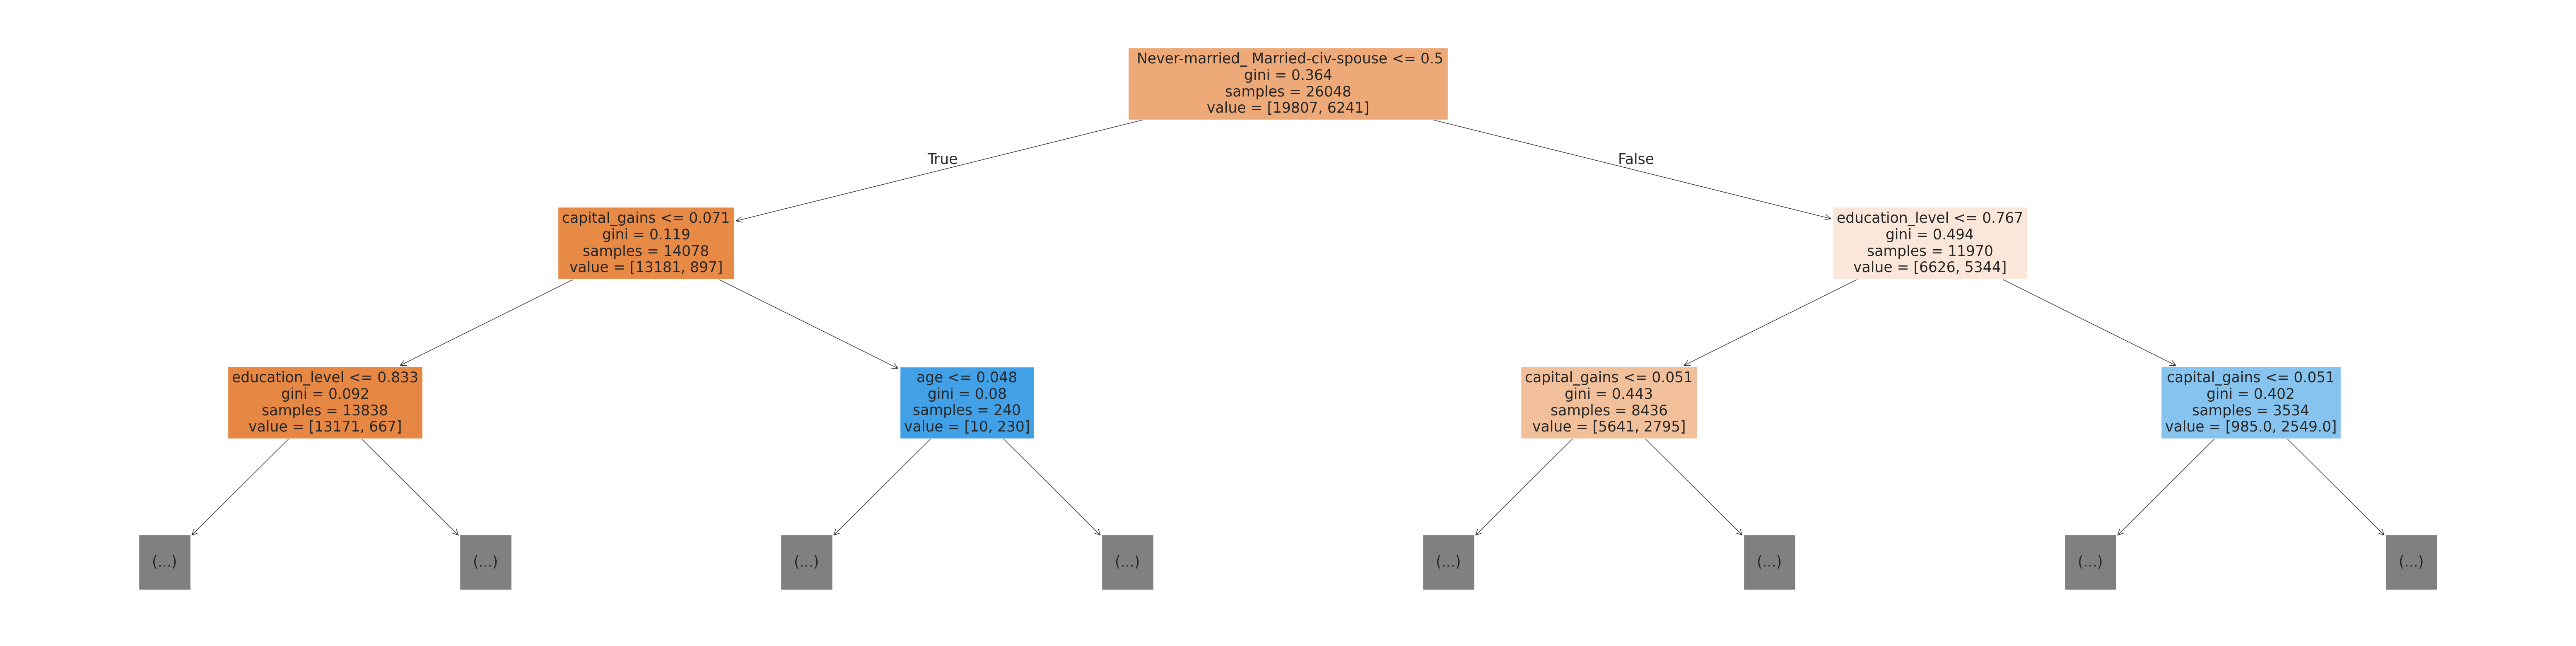

In [330]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [331]:
model.tree_.max_depth

43

We can also display the tree as text, which can be easier to follow for deeper trees.

In [336]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|---  Never-married_ Married-civ-spouse <= 0.50
|   |--- capital_gains <= 0.07
|   |   |--- education_level <= 0.83
|   |   |   |--- hours_week_work <= 0.44
|   |   |   |   |--- capital_loss <= 0.51
|   |   |   |   |   |--- age <= 0.24
|   |   |   |   |   |   |---  Not-in-family_ Wife <= 0.50
|   |   |   |   |   |   |   |--- age <= 0.16
|   |   |   |   |   |   |   |   |---  Bachelors_ Bachelors <= 0.50
|   |   |   |   |   |   |   |   |   |---  State-gov_ Local-gov <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- address <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- address >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |---  State-gov_ Local-gov >  0.50
|   |   |   |   |   |   |   |   |   |   |---  Bachelors_ 5th-6th <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   | 

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [332]:
model.feature_importances_

array([1.19865786e-01, 1.80197924e-01, 1.11574978e-01, 1.02856083e-01,
       3.76865180e-02, 6.15948144e-02, 8.32929371e-04, 4.76965763e-03,
       6.62832639e-03, 0.00000000e+00, 1.12676128e-02, 3.96750404e-03,
       8.16238508e-03, 4.95690230e-03, 0.00000000e+00, 4.00161744e-04,
       5.49721257e-04, 3.78705670e-04, 1.40493425e-04, 4.99975958e-04,
       5.04065982e-04, 4.37855533e-04, 1.43760456e-03, 2.42919577e-03,
       2.97034458e-03, 5.76614384e-04, 5.23028415e-03, 1.91795572e-03,
       0.00000000e+00, 1.53659143e-03, 2.40269960e-03, 2.99399619e-03,
       6.58269364e-05, 1.99710018e-01, 7.01166914e-04, 1.90958861e-03,
       6.07368200e-04, 9.58857948e-04, 1.55597577e-03, 3.54521015e-03,
       0.00000000e+00, 8.46249702e-03, 1.01703918e-02, 3.96965278e-03,
       2.17089366e-03, 5.04002343e-03, 5.39198247e-03, 0.00000000e+00,
       8.16556884e-03, 2.49446619e-03, 7.51191845e-03, 5.24645278e-03,
       4.81148293e-03, 2.72602750e-03, 1.52006353e-03, 1.02734138e-03,
      

In [333]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [334]:
importance_df.head(10)

,feature,importance
33,Never-married_ Married-civ-spouse,0.199710
1,address,0.180198
0,age,0.119866
2,education_level,0.111575
3,capital_gains,0.102856
5,hours_week_work,0.061595
4,capital_loss,0.037687
10,State-gov_ Private,0.011268
42,Adm-clerical_ Exec-managerial,0.010170
41,Adm-clerical_ Craft-repair,0.008462


## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

### `max_depth`

Lowering the max_depth of the decision tree and playing around with the number of max_leaf_nodes may help discover the best parameters to prevent overfitting.

A graph modeling training error vs validation error per # of max_depths will show the most optimal # for max_depth

In [338]:
model.tree_.max_depth

43

In [339]:
from sklearn.tree import DecisionTreeClassifier

In [343]:
model = DecisionTreeClassifier(max_leaf_nodes=128, max_depth=3, random_state=42)

In [344]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=128, random_state=42)

In [346]:
model.score(X_train, y_train)

0.8440571253071253

In [347]:
model.score(X_val, y_val)

0.8393734643734644

In [348]:
model.classes_

array([' <=50K', ' >50K'], dtype=object)

[Text(0.5, 0.875, ' Never-married_ Married-civ-spouse <= 0.5\ngini = 0.364\nsamples = 26048\nvalue = [19807, 6241]\nclass =  <=50K'),
 Text(0.25, 0.625, 'capital_gains <= 0.071\ngini = 0.119\nsamples = 14078\nvalue = [13181, 897]\nclass =  <=50K'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'education_level <= 0.833\ngini = 0.092\nsamples = 13838\nvalue = [13171, 667]\nclass =  <=50K'),
 Text(0.0625, 0.125, 'gini = 0.07\nsamples = 13115\nvalue = [12636, 479]\nclass =  <=50K'),
 Text(0.1875, 0.125, 'gini = 0.385\nsamples = 723\nvalue = [535.0, 188.0]\nclass =  <=50K'),
 Text(0.375, 0.375, 'age <= 0.048\ngini = 0.08\nsamples = 240\nvalue = [10, 230]\nclass =  >50K'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass =  <=50K'),
 Text(0.4375, 0.125, 'gini = 0.05\nsamples = 236\nvalue = [6, 230]\nclass =  >50K'),
 Text(0.75, 0.625, 'education_level <= 0.767\ngini = 0.494\nsamples = 11970\nvalue = [6626, 5344]\nclass =  <=50K'),
 Text(0.625, 0.75, '  False'),
 Text

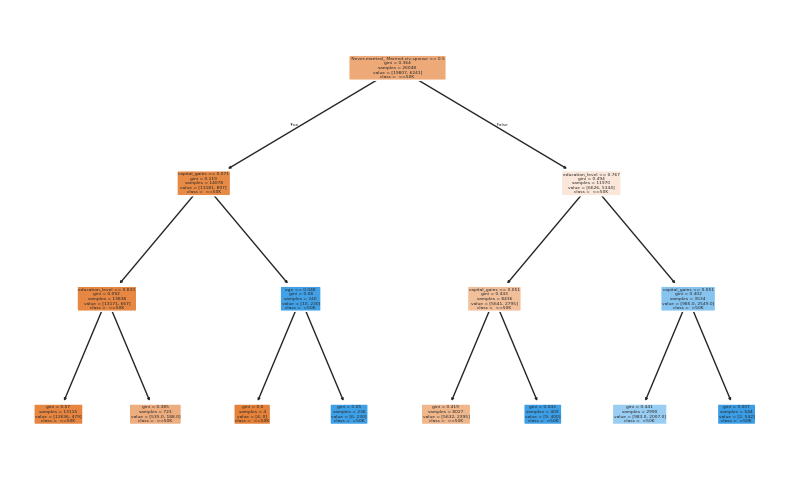

In [350]:
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [351]:
print(export_text(model, feature_names=list(X_train.columns)))

|---  Never-married_ Married-civ-spouse <= 0.50
|   |--- capital_gains <= 0.07
|   |   |--- education_level <= 0.83
|   |   |   |--- class:  <=50K
|   |   |--- education_level >  0.83
|   |   |   |--- class:  <=50K
|   |--- capital_gains >  0.07
|   |   |--- age <= 0.05
|   |   |   |--- class:  <=50K
|   |   |--- age >  0.05
|   |   |   |--- class:  >50K
|---  Never-married_ Married-civ-spouse >  0.50
|   |--- education_level <= 0.77
|   |   |--- capital_gains <= 0.05
|   |   |   |--- class:  <=50K
|   |   |--- capital_gains >  0.05
|   |   |   |--- class:  >50K
|   |--- education_level >  0.77
|   |   |--- capital_gains <= 0.05
|   |   |   |--- class:  >50K
|   |   |--- capital_gains >  0.05
|   |   |   |--- class:  >50K



In [354]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [355]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

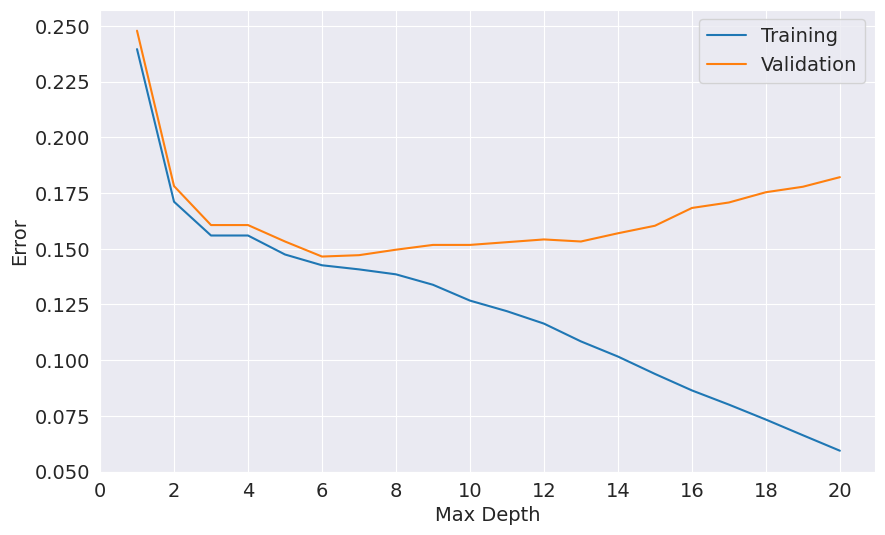

In [356]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.legend(['Training Error', 'Validation Error'])
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend(['Training', 'Validation'])

In [357]:
max_depth_error(6)

{'Max Depth': 6,
 'Training Error': 0.1425829238329238,
 'Validation Error': 0.14649877149877155}

In [358]:
max_depth_6_accuracy = 1 - 0.14649877
max_depth_6_accuracy

0.85350123

Training A Random Forest Classifier Model With Hyperparamter Tuning

In [360]:
from sklearn.ensemble import RandomForestClassifier

In [379]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [402]:
def test_params(**params):
    # Initialize and train the model
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, y_train)

    # Predictions on validation and test sets
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate precision, recall, and F1 scores on test set
    precision = precision_score(y_test, y_test_pred, pos_label=' >50K')
    recall = recall_score(y_test, y_test_pred, pos_label=' >50K')
    f1 = f1_score(y_test, y_test_pred, pos_label=' >50K')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')

    # Confusion matrix for test set
    cm = confusion_matrix(y_test, y_test_pred, labels=[' <=50K', ' >50K'])
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Create a table of the most important features
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Return accuracy scores for training, validation, and test sets
    return model.score(X_train, y_train), model.score(X_val, y_val), model.score(X_test, y_test), importance_df


bootstrap=True shows whether bootstrap samples are used when building trees, and n_estimators is # of trees.

bootstrap = true enables *boot strapping* , where each tree in the forest is trained on a random subset of the data with replacement - allowing it to perform well on diverse data by reducing variance

max_samples=0.5 controls the proportion of the dataset used to train each individual tree; 0.5 --> 50% of the data (with replacement, due to bootstrap=True) - reducing max_samples can increase model diversity

In [366]:
test_params(bootstrap=True, n_estimators = 1500, max_samples=0.5)

(0.9712453931203932, 0.8605651105651105)

Precision: 0.7636363636363637
Recall: 0.6355611601513241
F1: 0.6937370956641431


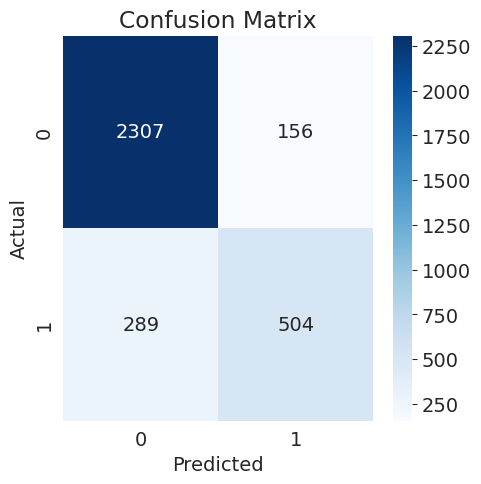

(0.9700552825552825,
 0.8624078624078624,
 0.8633292383292384,
                                         feature  importance
 1                                       address    0.150595
 0                                           age    0.149685
 3                                 capital_gains    0.090769
 5                               hours_week_work    0.083099
 2                               education_level    0.069665
 33            Never-married_ Married-civ-spouse    0.061944
 53                       Not-in-family_ Husband    0.039740
 4                                  capital_loss    0.028255
 35                 Never-married_ Never-married    0.025540
 42                Adm-clerical_ Exec-managerial    0.018076
 48                 Adm-clerical_ Prof-specialty    0.016360
 54                 Not-in-family_ Not-in-family    0.012065
 10                           State-gov_ Private    0.011592
 24                         Bachelors_ Bachelors    0.010698
 65                   

In [403]:
test_params(bootstrap=True, n_estimators = 200, max_samples=0.5)

Print the 10 Most Important Features to Determine if An Adult makes > 50k or <= 50k

In [404]:
importance_df.head(10)

,feature,importance
33,Never-married_ Married-civ-spouse,0.199710
1,address,0.180198
0,age,0.119866
2,education_level,0.111575
3,capital_gains,0.102856
5,hours_week_work,0.061595
4,capital_loss,0.037687
10,State-gov_ Private,0.011268
42,Adm-clerical_ Exec-managerial,0.010170
41,Adm-clerical_ Craft-repair,0.008462
